In [7]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
dataset = load_boston()

In [3]:
X, y = dataset['data'], dataset['target']

In [4]:
X.shape

(506, 13)

In [5]:
help(load_boston)

Help on function load_boston in module sklearn.datasets.base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============     ==============
    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.
    ==============     ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of bost

In [20]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

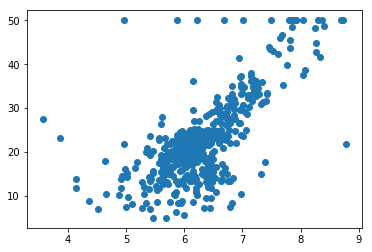

In [21]:
draw_rm_and_price()

In [9]:
room_num = X[:, 5]

In [10]:
price = y

In [11]:
import random


In [12]:
import numpy as np

In [83]:
def func(age, k, b): return k * age + b
def loss(y, yhat):
    """
    :param y: the real fares
    :param yhat: the estimated fares
    :return: how good is the estimated fares
    """

    return np.mean(np.abs(y - yhat))
    # return np.mean(np.square(y - yhat))
    # return np.mean(np.sqrt(y - yhat))

min_error_rate = float('inf')

loop_times = 10000

losses = []

change_directions = [
    # (k, b)
    (+1, -1), # k increase, b decrease
    (+1, +1),
    (-1, +1),
    (-1, -1)  # k decrease, b decrease
]

k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10

best_k, best_b = k_hat, b_hat

best_direction = None


def step(): return random.random() * 1


direction = random.choice(change_directions)


def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])


def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])


learing_rate = 0.25

while loop_times > 0:

    k_delta = -1 * learing_rate * derivate_k(price, func(room_num, k_hat, b_hat), room_num)
    b_delta = -1 * learing_rate * derivate_b(price, func(room_num, k_hat, b_hat))

    k_delta_direction, b_delta_direction = direction
    
    k_delta = k_delta_direction * step()
    b_delta = b_delta_direction * step()
    
    new_k = best_k + k_delta
    new_b = best_b + b_delta

    k_hat += k_delta
    b_hat += b_delta

    estimated_price = func(room_num, k_hat, b_hat)
    error_rate = loss(y=price, yhat=estimated_price)

    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_b = new_k, new_b
        best_k, best_b = k_hat, b_hat
        direction = (k_delta_direction, b_delta_direction)
    else:
        direction = random.choice(list(set(change_directions) - {(k_delta_direction, b_delta_direction)}))

        # print(min_error_rate)
    print('loop == {}'.format(loop_times))
        # losses.append(min_error_rate)
    print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))

    losses.append(error_rate)

    loop_times -= 1

# plt.scatter(sub_age, sub_fare)
# plt.plot(sub_age, func(sub_age, best_k, best_b), c='r')
# plt.plot(sub_age, func(sub_age, k_hat, b_hat), c='r')
# plt.show()



loop == 10000
f(age) = 2.4648809136875367 * age + -2.7432536968217978, with error rate: 10.216789463761664
loop == 9999
f(age) = 2.3956892436247488 * age + -2.1625617562849144, with error rate: 10.099252368485718
loop == 9998
f(age) = 2.3956892436247488 * age + -2.1625617562849144, with error rate: 12.319876047566952
loop == 9997
f(age) = 2.30490010026635 * age + -0.9362008843306068, with error rate: 9.57324942318343
loop == 9996
f(age) = 2.447609948126141 * age + -0.8980468076842972, with error rate: 8.857953961710688
loop == 9995
f(age) = 3.3338217468203646 * age + -0.1847131316178503, with error rate: 5.573331777250308
loop == 9994
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 5.440986254214233
loop == 9993
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 8.205811670254741
loop == 9992
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 11.047786067116533
loop == 9991
f(age) = 3.4144497726253333 * age + 0.365316

f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 51.98818649651091
loop == 9857
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 53.41042826514553
loop == 9856
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 49.72740384282689
loop == 9855
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 50.85304092664415
loop == 9854
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 47.39045200304194
loop == 9853
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 47.222165221428554
loop == 9852
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 43.99241981808175
loop == 9851
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 50.354689726218375
loop == 9850
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 54.11160746999875
loop == 9849
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with e

loop == 9745
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 86.36454096532563
loop == 9744
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 81.08250412371503
loop == 9743
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 84.51976225404577
loop == 9742
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 81.54760876262124
loop == 9741
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 74.94601604732999
loop == 9740
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 78.6825288205084
loop == 9739
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 74.25016975743809
loop == 9738
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 69.14447849263101
loop == 9737
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 68.28850087161048
loop == 9736
f(age) = 3.4144497726253333 * age + 0.36531641106951

loop == 9593
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 39.84247695397722
loop == 9592
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 38.00228286320591
loop == 9591
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 41.87121980061514
loop == 9590
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 40.48237974072998
loop == 9589
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 47.096804108824124
loop == 9588
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 44.52558707407834
loop == 9587
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 42.02366074232082
loop == 9586
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 40.71399458716179
loop == 9585
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 46.73853921440329
loop == 9584
f(age) = 3.4144497726253333 * age + 0.365316411069

loop == 9443
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 60.7547961967866
loop == 9442
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 55.7721766247889
loop == 9441
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 61.89895993800957
loop == 9440
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 59.665946022836
loop == 9439
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 64.74676692321174
loop == 9438
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 61.35705317719191
loop == 9437
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 61.82322133658405
loop == 9436
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 57.3294704609786
loop == 9435
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 57.793747211052334
loop == 9434
f(age) = 3.4144497726253333 * age + 0.3653164110695125,

loop == 9327
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 88.82829899358482
loop == 9326
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 85.86111664216108
loop == 9325
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 84.95447886139111
loop == 9324
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 85.39114555397025
loop == 9323
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 84.67976656487897
loop == 9322
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 84.65063866654872
loop == 9321
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 91.09701735006846
loop == 9320
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 89.51506130209076
loop == 9319
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 89.91405088319428
loop == 9318
f(age) = 3.4144497726253333 * age + 0.3653164110695

loop == 9214
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 85.51800410088589
loop == 9213
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 79.7238263290307
loop == 9212
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 79.5428843588424
loop == 9211
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 79.49175105777154
loop == 9210
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 75.95478778632433
loop == 9209
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 70.92674462239154
loop == 9208
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 72.95318625645591
loop == 9207
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 70.48771138243092
loop == 9206
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 71.12005634735864
loop == 9205
f(age) = 3.4144497726253333 * age + 0.365316411069512

loop == 9086
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 12.572055234537293
loop == 9085
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 17.533263666022524
loop == 9084
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 20.521047246717508
loop == 9083
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 18.673058759108862
loop == 9082
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 15.926642585406086
loop == 9081
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 19.54841182953645
loop == 9080
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 22.133991659716322
loop == 9079
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 19.604874747798497
loop == 9078
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 22.234208094667554
loop == 9077
f(age) = 3.4144497726253333 * age + 0.36531

loop == 8930
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 39.605052559507136
loop == 8929
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 37.449822968576356
loop == 8928
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 35.76720230588839
loop == 8927
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 35.0781794623385
loop == 8926
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 36.26654321513203
loop == 8925
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 39.43456362729152
loop == 8924
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 40.01785432689702
loop == 8923
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 42.29874857360013
loop == 8922
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 37.05209114391323
loop == 8921
f(age) = 3.4144497726253333 * age + 0.365316411069

loop == 8785
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 57.054531763519336
loop == 8784
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 51.98577397463752
loop == 8783
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 47.057177341808
loop == 8782
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 45.4914624010453
loop == 8781
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 48.22048012403855
loop == 8780
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 46.18953187894093
loop == 8779
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 43.38910159015051
loop == 8778
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 42.82886697819142
loop == 8777
f(age) = 3.4144497726253333 * age + 0.3653164110695125, with error rate: 38.190635130845756
loop == 8776
f(age) = 3.4144497726253333 * age + 0.36531641106951

loop == 8620
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 25.09325961958687
loop == 8619
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 27.08242376368346
loop == 8618
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 31.409665073521296
loop == 8617
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 28.587193962202203
loop == 8616
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 34.21240687354873
loop == 8615
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 30.184972439306588
loop == 8614
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 35.83127919512682
loop == 8613
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 34.522962196766656
loop == 8612
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 41.138724188415715
loop == 8611
f(age) = 4.690896069166955 * age + -7.267789942870657, 

loop == 8427
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 37.34456275463067
loop == 8426
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 36.994682634701924
loop == 8425
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 40.36878691873621
loop == 8424
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 39.454426917954564
loop == 8423
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 40.6152454296281
loop == 8422
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 44.778158440215655
loop == 8421
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 38.99172895612215
loop == 8420
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 44.732717182203515
loop == 8419
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 38.76190343305677
loop == 8418
f(age) = 4.690896069166955 * age + -7.267789942870657, wi

loop == 8278
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 54.86022507520836
loop == 8277
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 51.69970015335961
loop == 8276
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 51.40809768212178
loop == 8275
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 52.20624052315445
loop == 8274
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 50.60935389985068
loop == 8273
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 49.10051846311063
loop == 8272
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 46.786995238765506
loop == 8271
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 51.45957231178706
loop == 8270
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 56.1761331500814
loop == 8269
f(age) = 4.690896069166955 * age + -7.267789942870657, with 

loop == 8028
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 34.13254018188545
loop == 8027
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 36.9342242299341
loop == 8026
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 41.44562343676407
loop == 8025
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 40.208486744443285
loop == 8024
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 44.49902752237717
loop == 8023
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 45.192830299910646
loop == 8022
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 44.558162741263395
loop == 8021
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 44.85501100079134
loop == 8020
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 42.91734303681185
loop == 8019
f(age) = 4.690896069166955 * age + -7.267789942870657, wit

loop == 7888
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 17.124243321212322
loop == 7887
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 21.225122438229917
loop == 7886
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 21.162888545903755
loop == 7885
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 21.550814863553367
loop == 7884
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 26.774587532981666
loop == 7883
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 28.462678795331986
loop == 7882
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 25.95638918436711
loop == 7881
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 28.200688185460006
loop == 7880
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 22.928508404711444
loop == 7879
f(age) = 4.690896069166955 * age + -7.26778994287065

loop == 7808
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 27.084559536927276
loop == 7807
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 29.51643683094455
loop == 7806
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 24.65230930423308
loop == 7805
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 29.238874966920218
loop == 7804
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 29.251190485441363
loop == 7803
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 24.807236266737792
loop == 7802
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 27.370450153142887
loop == 7801
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 23.02283747062217
loop == 7800
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 25.853385675829507
loop == 7799
f(age) = 4.690896069166955 * age + -7.267789942870657,

loop == 7685
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 12.757394749323858
loop == 7684
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 16.500396698845297
loop == 7683
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 19.285153711809798
loop == 7682
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 13.157826980830322
loop == 7681
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 17.086151897708298
loop == 7680
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 13.965458101994415
loop == 7679
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 16.45049276576829
loop == 7678
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 16.374167711945486
loop == 7677
f(age) = 4.690896069166955 * age + -7.267789942870657, with error rate: 16.574714125732395
loop == 7676
f(age) = 4.690896069166955 * age + -7.26778994287065

loop == 7530
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 34.51024451944987
loop == 7529
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 29.317258291027066
loop == 7528
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 31.049480591014888
loop == 7527
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 25.51146482040576
loop == 7526
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 24.975607959021737
loop == 7525
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 29.7755816775526
loop == 7524
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 24.801298901732267
loop == 7523
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 30.742639847047084
loop == 7522
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 32.73881836536324
loop == 7521
f(age) = 6.149235312202937 * age + -16.37519350162084, w

loop == 7379
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 57.648312969551796
loop == 7378
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 58.875883205617335
loop == 7377
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 58.49786874150931
loop == 7376
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 60.88124011327432
loop == 7375
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 60.824766768197975
loop == 7374
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 63.05643871039407
loop == 7373
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 58.697558930260065
loop == 7372
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 62.510023250826364
loop == 7371
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 63.10346298319264
loop == 7370
f(age) = 6.149235312202937 * age + -16.37519350162084, 

loop == 7265
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 86.61289483113916
loop == 7264
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 80.12139007159438
loop == 7263
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 84.49164410159737
loop == 7262
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 83.15821708399334
loop == 7261
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 83.89563355710953
loop == 7260
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 83.28658294909685
loop == 7259
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 86.01603715292843
loop == 7258
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 92.58126860926437
loop == 7257
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 86.10909287376066
loop == 7256
f(age) = 6.149235312202937 * age + -16.37519350162084, with 

loop == 7110
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 67.31160462757299
loop == 7109
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 65.21450191857278
loop == 7108
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 59.201091988701506
loop == 7107
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 62.44185938434754
loop == 7106
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 61.096790498501676
loop == 7105
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 57.00335298986068
loop == 7104
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 56.35511221460602
loop == 7103
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 58.088210696617416
loop == 7102
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 52.7791936822215
loop == 7101
f(age) = 6.149235312202937 * age + -16.37519350162084, wit

loop == 7028
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 26.987064554515886
loop == 7027
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 22.420107515683945
loop == 7026
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 22.984202063348857
loop == 7025
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 22.180842198784433
loop == 7024
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 28.315845761359622
loop == 7023
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 32.595579621015325
loop == 7022
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 31.651741078930204
loop == 7021
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 30.12854587275955
loop == 7020
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 32.48099318233035
loop == 7019
f(age) = 6.149235312202937 * age + -16.37519350162084

loop == 6874
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 22.605131553225444
loop == 6873
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 26.307647578642314
loop == 6872
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 28.45630667144818
loop == 6871
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 23.28916078553798
loop == 6870
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 22.2836283994197
loop == 6869
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 24.10306038872623
loop == 6868
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 22.675341076146236
loop == 6867
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 24.211224029659096
loop == 6866
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 21.524879598498934
loop == 6865
f(age) = 6.149235312202937 * age + -16.37519350162084, w

loop == 6759
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 43.123410544807996
loop == 6758
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 48.89068860202312
loop == 6757
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 43.79309563796043
loop == 6756
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 44.576914424110484
loop == 6755
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 47.471903721641404
loop == 6754
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 41.528445358980555
loop == 6753
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 45.75323301282135
loop == 6752
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 44.9600839754808
loop == 6751
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 49.59665012221787
loop == 6750
f(age) = 6.149235312202937 * age + -16.37519350162084, wi

loop == 6598
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 94.19821343547159
loop == 6597
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 97.14181637977886
loop == 6596
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 93.09614127157482
loop == 6595
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 92.89192484771198
loop == 6594
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 87.17243764888381
loop == 6593
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 93.91339452240132
loop == 6592
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 88.18703885600895
loop == 6591
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 89.42828879926842
loop == 6590
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 84.96318480220168
loop == 6589
f(age) = 6.149235312202937 * age + -16.37519350162084, with 

loop == 6450
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 71.48996055607823
loop == 6449
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 68.5117713283532
loop == 6448
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 71.11671607549538
loop == 6447
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 77.14276152007865
loop == 6446
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 81.82136467183267
loop == 6445
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 84.76662830648318
loop == 6444
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 81.1496935343047
loop == 6443
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 84.07526896438415
loop == 6442
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 87.03994703038134
loop == 6441
f(age) = 6.149235312202937 * age + -16.37519350162084, with er

loop == 6311
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 142.84523633483155
loop == 6310
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 142.88038849631033
loop == 6309
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 146.36632361432183
loop == 6308
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 141.59873724606348
loop == 6307
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 147.38753098077993
loop == 6306
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 148.07201188920723
loop == 6305
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 145.4330313579337
loop == 6304
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 151.64477930658202
loop == 6303
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 154.741811735911
loop == 6302
f(age) = 6.149235312202937 * age + -16.37519350162084,

loop == 6157
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 145.33058559010962
loop == 6156
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 145.15976950757388
loop == 6155
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 149.85225981456145
loop == 6154
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 151.24241725378204
loop == 6153
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 149.26038692876062
loop == 6152
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 150.50422522652505
loop == 6151
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 147.59616761535997
loop == 6150
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 153.71907035303008
loop == 6149
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 154.89204507984417
loop == 6148
f(age) = 6.149235312202937 * age + -16.375193501620

loop == 6021
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 154.93937892138845
loop == 6020
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 153.6651197609521
loop == 6019
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 154.28328661312275
loop == 6018
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 151.99909296871536
loop == 6017
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 151.55120657667646
loop == 6016
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 145.72674068956746
loop == 6015
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 151.82023387829122
loop == 6014
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 149.78691647626025
loop == 6013
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 146.40218249162965
loop == 6012
f(age) = 6.149235312202937 * age + -16.3751935016208

loop == 5877
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 103.07825858499123
loop == 5876
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 107.55804780315509
loop == 5875
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 104.29287519589715
loop == 5874
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 105.22382385025485
loop == 5873
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 101.13022070522122
loop == 5872
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 104.48028724400203
loop == 5871
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 103.16649062270194
loop == 5870
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 96.90036448771198
loop == 5869
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 92.88651448225643
loop == 5868
f(age) = 6.149235312202937 * age + -16.37519350162084

loop == 5730
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 121.145839037916
loop == 5729
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 121.79970368516346
loop == 5728
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 120.51001465466851
loop == 5727
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 116.99576930364134
loop == 5726
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 120.80800216691054
loop == 5725
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 116.1733573929325
loop == 5724
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 121.55319549143863
loop == 5723
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 120.832505525513
loop == 5722
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 116.51834921644492
loop == 5721
f(age) = 6.149235312202937 * age + -16.37519350162084, w

loop == 5566
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 38.972363065999474
loop == 5565
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 41.2398504023724
loop == 5564
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 41.288512490200134
loop == 5563
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 38.36105191508032
loop == 5562
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 41.32936067187609
loop == 5561
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 38.7107178767835
loop == 5560
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 40.43644941788475
loop == 5559
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 45.632452732120306
loop == 5558
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 40.47335835314287
loop == 5557
f(age) = 6.149235312202937 * age + -16.37519350162084, with

loop == 5425
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 13.473975032385633
loop == 5424
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 18.870873183303953
loop == 5423
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 20.12716094212273
loop == 5422
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 13.948407843992912
loop == 5421
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 18.753888729764096
loop == 5420
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 18.375246672686842
loop == 5419
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 14.203774960410566
loop == 5418
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 12.309190589856286
loop == 5417
f(age) = 6.149235312202937 * age + -16.37519350162084, with error rate: 10.12813575717682
loop == 5416
f(age) = 6.149235312202937 * age + -16.37519350162084

loop == 5283
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 38.68470833966924
loop == 5282
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 39.74025214873213
loop == 5281
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 44.29798198785717
loop == 5280
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 44.0482049680938
loop == 5279
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 42.37300246037281
loop == 5278
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 43.45200313836843
loop == 5277
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 43.14330004077942
loop == 5276
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 43.679735045176166
loop == 5275
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 49.200143778101044
loop == 5274
f(age) = 10.327380215172802 * age + -42.2

loop == 5135
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 97.58806155886869
loop == 5134
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 101.92455098400879
loop == 5133
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 101.21169475618261
loop == 5132
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 100.87905372261832
loop == 5131
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 102.8059006443793
loop == 5130
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 99.20809749456947
loop == 5129
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 102.1544563454004
loop == 5128
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 97.1957941816772
loop == 5127
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 100.20737266056743
loop == 5126
f(age) = 10.327380215172802 * age + -42

loop == 4975
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 120.85119169026514
loop == 4974
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 124.69577826553726
loop == 4973
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 123.78298458831115
loop == 4972
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 118.61136184906228
loop == 4971
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 115.01040447600397
loop == 4970
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 115.95287799058187
loop == 4969
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 113.31896775187165
loop == 4968
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 117.32207809063813
loop == 4967
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 113.47711175755774
loop == 4966
f(age) = 10.327380215172802 * age

loop == 4839
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 111.98862571934586
loop == 4838
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 113.66127755253373
loop == 4837
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 114.14734641394664
loop == 4836
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 119.67376648338889
loop == 4835
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 117.35109472661547
loop == 4834
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 114.45883125100086
loop == 4833
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 117.22598664046242
loop == 4832
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 117.16102277214185
loop == 4831
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 119.43828328676226
loop == 4830
f(age) = 10.327380215172802 * age

loop == 4685
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 134.00874432254912
loop == 4684
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 135.8846169593183
loop == 4683
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 141.77007534429094
loop == 4682
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 140.90608849022829
loop == 4681
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 136.65086971932868
loop == 4680
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 137.42563205926203
loop == 4679
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 132.99883842012113
loop == 4678
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 132.84844443605664
loop == 4677
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 126.75433418706062
loop == 4676
f(age) = 10.327380215172802 * age 

loop == 4536
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 152.73515461242124
loop == 4535
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 153.96228329186184
loop == 4534
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 158.39828679862717
loop == 4533
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 153.95993530921055
loop == 4532
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 148.50983709423872
loop == 4531
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 153.5810127289053
loop == 4530
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 157.36444387115057
loop == 4529
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 152.87851012180874
loop == 4528
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 147.9301434193884
loop == 4527
f(age) = 10.327380215172802 * age +

loop == 4395
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 132.40409109804614
loop == 4394
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 132.5230425116692
loop == 4393
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 129.39842979025502
loop == 4392
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 130.380723008794
loop == 4391
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 133.05793701461855
loop == 4390
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 130.39773588651835
loop == 4389
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 135.32195663793695
loop == 4388
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 130.83138462358875
loop == 4387
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 130.58956744605157
loop == 4386
f(age) = 10.327380215172802 * age + 

loop == 4241
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 114.89114852920656
loop == 4240
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 110.48859509720715
loop == 4239
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 112.68620154428439
loop == 4238
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 115.5552688087021
loop == 4237
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 115.81633997033576
loop == 4236
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 117.91386527942957
loop == 4235
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 116.24837714077638
loop == 4234
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 120.83050400983853
loop == 4233
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 120.20240047841476
loop == 4232
f(age) = 10.327380215172802 * age 

loop == 4086
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 68.90042566588149
loop == 4085
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 71.79731763475282
loop == 4084
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 74.05904275988999
loop == 4083
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 70.23457462897406
loop == 4082
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 70.53357936730637
loop == 4081
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 72.63202761069131
loop == 4080
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 71.57217601730771
loop == 4079
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 68.85947013960757
loop == 4078
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 74.04922366759611
loop == 4077
f(age) = 10.327380215172802 * age + -42.29

loop == 3961
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 105.0973949502488
loop == 3960
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 107.7476737787379
loop == 3959
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 104.01410960047123
loop == 3958
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 111.09048723033514
loop == 3957
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 114.37925576206919
loop == 3956
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 111.07259005294459
loop == 3955
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 110.86266997992855
loop == 3954
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 104.64479098463978
loop == 3953
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 99.63790498486112
loop == 3952
f(age) = 10.327380215172802 * age + 

loop == 3817
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 97.61369047898013
loop == 3816
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 98.31057796336744
loop == 3815
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 94.88429407826568
loop == 3814
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 96.18806825802548
loop == 3813
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 94.05019907516431
loop == 3812
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 99.78700030611657
loop == 3811
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 105.92324859442432
loop == 3810
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 100.93043569402947
loop == 3809
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 105.09079620984059
loop == 3808
f(age) = 10.327380215172802 * age + -42

loop == 3694
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 100.82100575443678
loop == 3693
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 102.58339878422395
loop == 3692
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 99.60991676692649
loop == 3691
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 100.13430734033003
loop == 3690
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 97.24599332687988
loop == 3689
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 98.60967531783992
loop == 3688
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 104.61506620652996
loop == 3687
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 104.30933815791148
loop == 3686
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 101.01609438732996
loop == 3685
f(age) = 10.327380215172802 * age + 

loop == 3536
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 72.31498252745787
loop == 3535
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 73.89045180295274
loop == 3534
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 79.9158478851948
loop == 3533
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 82.27539959573929
loop == 3532
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 83.43675752077358
loop == 3531
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 81.54991326870177
loop == 3530
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 82.54495739130972
loop == 3529
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 87.12918510101359
loop == 3528
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 81.87479617796039
loop == 3527
f(age) = 10.327380215172802 * age + -42.290

loop == 3388
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 86.63587003494223
loop == 3387
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 89.21789959300946
loop == 3386
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 88.83332501287724
loop == 3385
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 85.44571445207698
loop == 3384
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 84.70865351133538
loop == 3383
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 81.04395775684067
loop == 3382
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 83.7020123634232
loop == 3381
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 78.19417649597466
loop == 3380
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 75.6615187670068
loop == 3379
f(age) = 10.327380215172802 * age + -42.2906

f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 115.45866742625431
loop == 3286
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 118.24474368289852
loop == 3285
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 117.37274956202353
loop == 3284
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 120.84631079243385
loop == 3283
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 116.50570043338276
loop == 3282
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 117.22106427328993
loop == 3281
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 113.68539718652092
loop == 3280
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 119.5413726346254
loop == 3279
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 116.91571473429842
loop == 3278
f(age) = 10.327380215172802 * age + -42.2906684

loop == 3097
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 69.37949066397167
loop == 3096
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 67.02683852144501
loop == 3095
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 60.30127962281156
loop == 3094
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 64.96756253788053
loop == 3093
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 63.27165407236398
loop == 3092
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 65.7316483284457
loop == 3091
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 61.68309993759548
loop == 3090
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 66.7863411769195
loop == 3089
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 62.47762934090449
loop == 3088
f(age) = 10.327380215172802 * age + -42.2906

loop == 3002
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 114.69155597803437
loop == 3001
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 110.26687488613165
loop == 3000
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 103.62909744981708
loop == 2999
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 108.05450814140103
loop == 2998
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 114.08586606415666
loop == 2997
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 111.21461751130119
loop == 2996
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 112.57615672564862
loop == 2995
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 107.71945573709043
loop == 2994
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 109.6417455037156
loop == 2993
f(age) = 10.327380215172802 * age 

loop == 2863
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 120.14983110066733
loop == 2862
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 116.53696077990912
loop == 2861
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 121.37556787538773
loop == 2860
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 119.90418183337465
loop == 2859
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 114.5381772051008
loop == 2858
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 111.50400610853943
loop == 2857
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 116.1322951483933
loop == 2856
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 110.0998254226464
loop == 2855
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 111.96351861400244
loop == 2854
f(age) = 10.327380215172802 * age + 

f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 89.29520819150001
loop == 2717
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 86.61208868441257
loop == 2716
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 82.254656929126
loop == 2715
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 79.04384368359311
loop == 2714
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 82.52867632511685
loop == 2713
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 88.99130465319152
loop == 2712
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 83.90442008195116
loop == 2711
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 80.99564289778293
loop == 2710
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 82.47862747449122
loop == 2709
f(age) = 10.327380215172802 * age + -42.290668497893996, 

loop == 2531
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 32.8724796349569
loop == 2530
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 32.08376385145896
loop == 2529
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 33.53430053732789
loop == 2528
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 33.49570381555172
loop == 2527
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 37.47099383990196
loop == 2526
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 35.409152483134385
loop == 2525
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 30.190442463007237
loop == 2524
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 34.14614791320628
loop == 2523
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 34.40078769873731
loop == 2522
f(age) = 10.327380215172802 * age + -42.2

loop == 2393
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 37.86671031697175
loop == 2392
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 31.486642062742494
loop == 2391
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 25.65135024051939
loop == 2390
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 19.17858088876499
loop == 2389
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 22.340168650752222
loop == 2388
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 26.98968356107822
loop == 2387
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 22.734673702620107
loop == 2386
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 27.397658514510965
loop == 2385
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 29.17038521391458
loop == 2384
f(age) = 10.327380215172802 * age + -4

loop == 2284
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 40.652765478885804
loop == 2283
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 42.45400564712133
loop == 2282
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 48.10739761642354
loop == 2281
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 42.229797119026635
loop == 2280
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 41.81820260276588
loop == 2279
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 40.182854794869186
loop == 2278
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 43.22476881039946
loop == 2277
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 40.13517124296752
loop == 2276
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 44.14886635255699
loop == 2275
f(age) = 10.327380215172802 * age + -42

loop == 2156
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 90.78870533214574
loop == 2155
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 92.12817976148065
loop == 2154
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 89.42256128207609
loop == 2153
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 87.14586355723529
loop == 2152
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 90.50576343646988
loop == 2151
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 87.3547345766667
loop == 2150
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 82.88725492401201
loop == 2149
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 82.1760767989495
loop == 2148
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 77.69011373505394
loop == 2147
f(age) = 10.327380215172802 * age + -42.2906

loop == 2068
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 77.5841371487586
loop == 2067
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 71.08566388789285
loop == 2066
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 71.93385770805223
loop == 2065
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 73.63887469704902
loop == 2064
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 72.58101019112806
loop == 2063
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 79.54719716154754
loop == 2062
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 74.6911913803379
loop == 2061
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 79.42304643939772
loop == 2060
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 77.36848453503835
loop == 2059
f(age) = 10.327380215172802 * age + -42.2906

f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 4.770825492912764
loop == 1943
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 4.82366699176911
loop == 1942
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 4.516748940913114
loop == 1941
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 4.587331697775246
loop == 1940
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 6.315436274810318
loop == 1939
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 8.649581211394393
loop == 1938
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 11.731329904710448
loop == 1937
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 11.33430974323254
loop == 1936
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 14.699676286784731
loop == 1935
f(age) = 10.327380215172802 * age + -42.29066849789399

loop == 1790
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 8.7075347587345
loop == 1789
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 10.802518267126565
loop == 1788
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 9.197093578822715
loop == 1787
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.621925021019276
loop == 1786
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.164870502204196
loop == 1785
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 4.9586520933921046
loop == 1784
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 8.101317907738286
loop == 1783
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.031706348505869
loop == 1782
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.3624145251526745
loop == 1781
f(age) = 10.327380215172802 * age + -42.2

loop == 1630
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 64.78162947837527
loop == 1629
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 63.19005857057331
loop == 1628
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 57.311862518538746
loop == 1627
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 57.03455625090236
loop == 1626
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 59.02776996571241
loop == 1625
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 58.755055735427476
loop == 1624
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 62.141554438360174
loop == 1623
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 65.46445204434524
loop == 1622
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 63.02072183978521
loop == 1621
f(age) = 10.327380215172802 * age + -42

loop == 1475
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 37.701566432629576
loop == 1474
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 38.5806246560012
loop == 1473
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 37.78122394624626
loop == 1472
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 38.62764332859676
loop == 1471
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 33.00416125068152
loop == 1470
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 27.293417153648594
loop == 1469
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 30.79949493457744
loop == 1468
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 24.631947112463468
loop == 1467
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 19.44633603945614
loop == 1466
f(age) = 10.327380215172802 * age + -42.

loop == 1326
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 35.92863572861107
loop == 1325
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 42.166950189357976
loop == 1324
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 46.78776938121083
loop == 1323
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 45.650771947081225
loop == 1322
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 47.39935971394217
loop == 1321
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 43.590467425064425
loop == 1320
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 44.7916083118903
loop == 1319
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 38.35775103219016
loop == 1318
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 41.07274380542551
loop == 1317
f(age) = 10.327380215172802 * age + -42.

loop == 1168
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.39552044537796
loop == 1167
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.432288715071036
loop == 1166
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.351666271607708
loop == 1165
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 7.5450731467299486
loop == 1164
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 8.688505046443165
loop == 1163
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.443378553851617
loop == 1162
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 7.302316842875155
loop == 1161
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.445519221362624
loop == 1160
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 4.8191563887701045
loop == 1159
f(age) = 10.327380215172802 * age + -42.2

f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.916282352088472
loop == 1040
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 7.933139265417352
loop == 1039
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 11.490021255782612
loop == 1038
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 12.191352378276148
loop == 1037
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 17.862456214817712
loop == 1036
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 17.847427900115118
loop == 1035
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 18.50999752484046
loop == 1034
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 14.640854152099374
loop == 1033
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 16.468676353791675
loop == 1032
f(age) = 10.327380215172802 * age + -42.290668497

loop == 890
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 9.685646760154581
loop == 889
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 11.949557513184367
loop == 888
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 7.726532263757414
loop == 887
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 10.761672137773752
loop == 886
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 6.105267875425926
loop == 885
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.969390728140678
loop == 884
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 5.9404090492203805
loop == 883
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 7.347790737257188
loop == 882
f(age) = 10.327380215172802 * age + -42.290668497893996, with error rate: 10.641062410265217
loop == 881
f(age) = 10.327380215172802 * age + -42.29066849

loop == 753
f(age) = 9.458295787167991 * age + -36.88729481818334, with error rate: 6.623320614124443
loop == 752
f(age) = 9.458295787167991 * age + -36.88729481818334, with error rate: 4.7641718979723775
loop == 751
f(age) = 9.458295787167991 * age + -36.88729481818334, with error rate: 4.651285512916723
loop == 750
f(age) = 9.458295787167991 * age + -36.88729481818334, with error rate: 6.25682875569086
loop == 749
f(age) = 9.458295787167991 * age + -36.88729481818334, with error rate: 5.6954591297560295
loop == 748
f(age) = 9.458295787167991 * age + -36.88729481818334, with error rate: 8.673069147664378
loop == 747
f(age) = 9.458295787167991 * age + -36.88729481818334, with error rate: 6.310934437975678
loop == 746
f(age) = 9.458295787167991 * age + -36.88729481818334, with error rate: 10.79843468323903
loop == 745
f(age) = 9.458295787167991 * age + -36.88729481818334, with error rate: 10.080976970701654
loop == 744
f(age) = 9.458295787167991 * age + -36.88729481818334, with error ra

loop == 596
f(age) = 9.458295787167991 * age + -36.88729481818334, with error rate: 4.7957048889977685
loop == 595
f(age) = 9.458295787167991 * age + -36.88729481818334, with error rate: 4.496361007532126
loop == 594
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 4.438685757997245
loop == 593
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 5.820026344755452
loop == 592
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 4.4803222646445295
loop == 591
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 7.555726287128947
loop == 590
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 7.077231332960872
loop == 589
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 9.428313416566075
loop == 588
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 8.182405783629001
loop == 587
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 6.4985487123

loop == 400
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 47.970955140065406
loop == 399
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 50.82479131809432
loop == 398
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 55.61210481423814
loop == 397
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 54.64545138355368
loop == 396
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 50.198879677210485
loop == 395
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 55.63460815736547
loop == 394
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 49.63739232293337
loop == 393
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 52.202004515447975
loop == 392
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 51.37031735574626
loop == 391
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 49.254525217920

loop == 292
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 18.763225706374918
loop == 291
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 18.65530554919608
loop == 290
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 13.923969385315322
loop == 289
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 17.048508563961015
loop == 288
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 12.011384719913956
loop == 287
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 15.064813952898525
loop == 286
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 11.686813539167947
loop == 285
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 16.544604884035998
loop == 284
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 21.60795029048968
loop == 283
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 21.32179361

loop == 42
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 33.38532108562897
loop == 41
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 34.42127824416916
loop == 40
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 29.749816382725463
loop == 39
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 30.119671448952612
loop == 38
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 24.6606154088493
loop == 37
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 23.119324529881485
loop == 36
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 22.888884681625225
loop == 35
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 16.54029006666685
loop == 34
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 20.455730374987755
loop == 33
f(age) = 9.4295804957117 * age + -36.50117602057156, with error rate: 15.16649264904399
loop =

best_k = 9.4295804957117, best_b = -36.50117602057156 ， min_error_rate = 4.438685757997245
learing_rate = 0.25


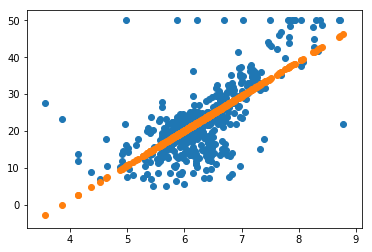

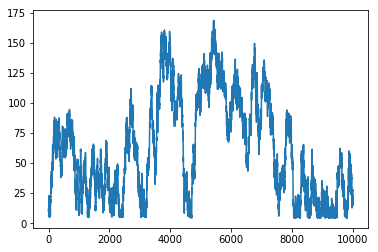

In [84]:
print('best_k = {}, best_b = {} ， min_error_rate = {}'.format(best_k , best_b, min_error_rate))

print('learing_rate = {}'.format(learing_rate))
draw_rm_and_price()
plt.scatter(room_num,func(room_num,best_k,best_b))
plt.show()

plt.plot(range(len(losses)), losses)
plt.show()
